In [1]:
#dataset https://www.kaggle.com/datasets/blastchar/telco-customer-churn
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
#load data
# drop customer id as it is not predictive
df=pd.read_csv('Customer_Churn.csv')
df.drop(columns="customerID", inplace=True)

In [3]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
#in some exploratory analysis I found blank values in TotalCharges, I remove then abd change the column to a float
df["TotalCharges"]=df["TotalCharges"].replace(" ", 0, regex=True)
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"])

In [6]:
#Cleaning up object columns for one-hot encoding
df_obj = df.select_dtypes('object')
df[df_obj.columns]=df[df_obj.columns].apply(lambda x: x.str.strip().str.lower())
df[df_obj.columns]=df[df_obj.columns].replace(" ", "_", regex=True)
df[df_obj.columns]=df[df_obj.columns].replace("-", "_", regex=True)

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [8]:
sum(df.duplicated())

22

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
sum(df.isnull().sum())

0

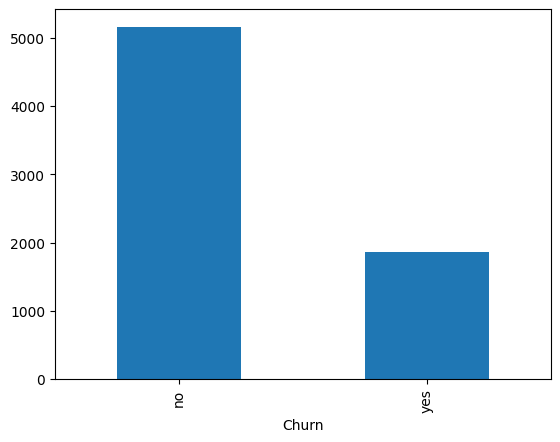

In [11]:
# noting target imbalance for later
target_counts=df["Churn"].value_counts()
target_counts.plot(kind='bar')
plt.show()

In [12]:
#make a list for one-hot encoding
obj_list=[]
for i in df.columns:
    if df[i].dtype=='object':
        obj_list.append(i)
print(obj_list)


['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [13]:
#apply one hot encoding
df_encoded = pd.get_dummies(df, columns=obj_list)
df_encoded.drop(columns="Churn_no", inplace=True)
df_encoded.rename(columns={"Churn_yes":"Churn"},inplace=True)


In [17]:
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_female,gender_male,Partner_no,Partner_yes,Dependents_no,Dependents_yes,...,Contract_month_to_month,Contract_one_year,Contract_two_year,PaperlessBilling_no,PaperlessBilling_yes,PaymentMethod_bank_transfer_(automatic),PaymentMethod_credit_card_(automatic),PaymentMethod_electronic_check,PaymentMethod_mailed_check,Churn
0,0,1,29.85,29.85,True,False,False,True,True,False,...,True,False,False,False,True,False,False,True,False,False
1,0,34,56.95,1889.50,False,True,True,False,True,False,...,False,True,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,False,True,True,False,True,False,...,True,False,False,False,True,False,False,False,True,True
3,0,45,42.30,1840.75,False,True,True,False,True,False,...,False,True,False,True,False,True,False,False,False,False
4,0,2,70.70,151.65,True,False,True,False,True,False,...,True,False,False,False,True,False,False,True,False,True


In [15]:
df_encoded.shape

(7021, 46)

In [16]:
#save our preprocessed dataset
df_encoded.to_csv("Churn_Preprocessed.csv", index=False)